## Загрузка датасета

In [66]:
import gdown
import zipfile
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
from mlxtend.frequent_patterns import apriori, association_rules

In [67]:
file_url = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/B3LcCk_urBnVtg'
output_path = 'data_original.zip'

gdown.download(file_url, output_path, quiet=False)
with zipfile.ZipFile(output_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

os.remove(output_path)

csv_file_path = '/content/orders_nov.csv'
df = pd.read_csv(csv_file_path, encoding='utf-8', sep=';', low_memory=False)
df

Downloading...
From: https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/B3LcCk_urBnVtg
To: C:\Users\syoma\Downloads\data_original.zip
100%|██████████| 46.5M/46.5M [00:05<00:00, 8.75MB/s]


,customer_id,user_sex,user_age,country,delivery_city,purchase_type,order_number,articul,title_name,date_paid,amount,sum_pv
0,3318042,W,38.0,Беларусь,Гродно,WEB,40119762,03315,HAPPY DEW Пенка для умывания для всех типов ко...,2024-11-11,1,3.0
1,3922531,W,42.0,Россия,Чайковский,WEB,40041404,03263,"BioTrim Экоспрей от жира и нагара, 500 мл",2024-11-07,1,4.5
2,3201886,W,38.0,Россия,Курск,WEB,40041645,03263,"BioTrim Экоспрей от жира и нагара, 500 мл",2024-11-07,1,4.5
3,4022175,W,35.0,Россия,Омск,WEB,40041665,06124,GREEN FIBER DUO Набор щеток для очищения трудн...,2024-11-07,1,8.0
4,3433550,W,54.0,Россия,Санкт-Петербург,RETAIL,1024-137100,070742,"ВЕЛЛАБ БАД МАГНИЙ & ВИТАМИН В6, 90 таблеток",2024-11-09,1,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2008565,2993846,U,30.0,Латвия,Рига,WEB,40670445,07054EU,"WELLLAB ImmunoHIT ACTIVE, 60 capsules",2024-12-06,1,6.3
2008566,688064,U,36.0,Германия,Вюрцбург,WEB,40670799,06124EU,Brush set for cleaning hard-to-reach places Gr...,2024-12-06,2,19.2
2008567,688064,U,36.0,Германия,Вюрцбург,WEB,40670799,08071,"Green Fiber AUTO S16, wet cleaning Car towel f...",2024-12-06,2,37.8
2008568,688064,U,36.0,Германия,Вюрцбург,WEB,40670799,06113EU,"Green Fiber HOME P1 Fiber for glassware, beige",2024-12-06,1,4.7


## Описание данных

Размер и структура данных

In [68]:
print("Размер данных (строк, столбцов):", df.shape)
print("\nТипы данных и количество пропущенных значений в каждом столбце:")
df.info()

Размер данных (строк, столбцов): (2008570, 12)

Типы данных и количество пропущенных значений в каждом столбце:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008570 entries, 0 to 2008569
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   customer_id    int64  
 1   user_sex       object 
 2   user_age       float64
 3   country        object 
 4   delivery_city  object 
 5   purchase_type  object 
 6   order_number   object 
 7   articul        object 
 8   title_name     object 
 9   date_paid      object 
 10  amount         int64  
 11  sum_pv         float64
dtypes: float64(2), int64(2), object(8)
memory usage: 183.9+ MB


Предварительный просмотр

In [69]:
print("\nПервые 5 строк данных:")
df.head()


Первые 5 строк данных:


,customer_id,user_sex,user_age,country,delivery_city,purchase_type,order_number,articul,title_name,date_paid,amount,sum_pv
0,3318042,W,38.0,Беларусь,Гродно,WEB,40119762,03315,HAPPY DEW Пенка для умывания для всех типов ко...,2024-11-11,1,3.0
1,3922531,W,42.0,Россия,Чайковский,WEB,40041404,03263,"BioTrim Экоспрей от жира и нагара, 500 мл",2024-11-07,1,4.5
2,3201886,W,38.0,Россия,Курск,WEB,40041645,03263,"BioTrim Экоспрей от жира и нагара, 500 мл",2024-11-07,1,4.5
3,4022175,W,35.0,Россия,Омск,WEB,40041665,06124,GREEN FIBER DUO Набор щеток для очищения трудн...,2024-11-07,1,8.0
4,3433550,W,54.0,Россия,Санкт-Петербург,RETAIL,1024-137100,070742,"ВЕЛЛАБ БАД МАГНИЙ & ВИТАМИН В6, 90 таблеток",2024-11-09,1,7.3


Описание числовых столбцов

In [70]:
print("\nСтатистическое описание числовых данных:")
df.describe().round(2)


Статистическое описание числовых данных:


,customer_id,user_age,amount,sum_pv
count,2008570.00,2008570.00,2008570.00,2008570.00
mean,3465037.20,39.59,1.36,6.14
std,1050727.99,8.04,1.43,10.75
min,236.00,15.00,1.00,0.00
25%,3020030.50,35.00,1.00,2.40
50%,3661890.00,40.00,1.00,3.70
75%,4286872.00,45.00,1.00,6.90
max,4708252.00,54.00,400.00,2618.00


## Описательные характеристики

Рассчитываем медиану для нескольких числовых столбцов

In [71]:
columns_to_analyze = ['user_age', 'amount', 'sum_pv']
median_values = df[columns_to_analyze].median()
print(f"Медиана по столбцам {columns_to_analyze}:")
median_values

Медиана по столбцам ['user_age', 'amount', 'sum_pv']:


user_age    40.0
amount       1.0
sum_pv       3.7
dtype: float64

Мат. ожидание (среднее)

In [72]:
columns_to_analyze = ['user_age', 'amount', 'sum_pv']
mean_values = df[columns_to_analyze].mean()
print(f"Математическое ожидание по столбцам {columns_to_analyze}:")
mean_values

Математическое ожидание по столбцам ['user_age', 'amount', 'sum_pv']:


user_age    39.588871
amount       1.364522
sum_pv       6.141429
dtype: float64

Проверка пропущенных значений

In [73]:
print("\nКоличество пропущенных значений по столбцам:")
print(df.isnull().sum())


Количество пропущенных значений по столбцам:
customer_id      0
user_sex         0
user_age         0
country          0
delivery_city    0
purchase_type    0
order_number     0
articul          0
title_name       0
date_paid        0
amount           0
sum_pv           0
dtype: int64


Анализ категориальных данных

In [74]:
categorical_columns = ['user_sex', 'country', 'delivery_city', 'purchase_type', "user_age"]  
print("\nАнализ уникальных значений в категориальных столбцах:")
for column in categorical_columns:
    if column in df.columns:
        print(f"{column}: {df[column].nunique()} уникальных значений")
        print(df[column].value_counts().head())



Анализ уникальных значений в категориальных столбцах:
user_sex: 3 уникальных значений
user_sex
W    1837043
M      94012
U      77515
Name: count, dtype: int64
country: 64 уникальных значений
country
Россия       1729815
Казахстан      78597
Беларусь       68650
Грузия         23395
Германия       16597
Name: count, dtype: int64
delivery_city: 7520 уникальных значений
delivery_city
Москва             131345
Санкт-Петербург     82913
Новосибирск         46942
Минск               42886
Екатеринбург        35199
Name: count, dtype: int64
purchase_type: 2 уникальных значений
purchase_type
WEB       1562546
RETAIL     446024
Name: count, dtype: int64
user_age: 40 уникальных значений
user_age
38.0    105153
37.0    104885
39.0    103641
41.0    103522
40.0    102108
Name: count, dtype: int64


Анализ дат

In [75]:
if 'date_paid' in df.columns:
    print("\nДиапазон дат:")
    print(f"Минимальная дата: {df['date_paid'].min()}")
    print(f"Максимальная дата: {df['date_paid'].max()}")


Диапазон дат:
Минимальная дата: 2024-11-07
Максимальная дата: 2024-12-06


Анализ возраста 

In [76]:
if 'user_age' in df.columns:
    print("\nДиапазон возраста:")
    valid_ages = df[df['user_age'] >= 0]
    print(f"Минимальный возраст: {valid_ages['user_age'].min()}")
    print(f"Максимальный возраст: {valid_ages['user_age'].max()}")


Диапазон возраста:
Минимальный возраст: 15.0
Максимальный возраст: 54.0


Обнаружение дубликатов

In [77]:
print("\nКоличество дублирующихся строк:", df.duplicated().sum())


Количество дублирующихся строк: 32915


In [78]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,customer_id,user_sex,user_age,country,delivery_city,purchase_type,order_number,articul,title_name,date_paid,amount,sum_pv
350,2929258,W,34.0,Россия,Северодвинск,RETAIL,0635-020787,070754,"WELLLAB БАД ЦИНК & CЕЛЕН,30 таблеток",2024-11-12,1,2.9
351,2929258,W,34.0,Россия,Северодвинск,RETAIL,0635-020787,070754,"WELLLAB БАД ЦИНК & CЕЛЕН,30 таблеток",2024-11-12,1,2.9
407,3234501,W,33.0,Россия,Казань,RETAIL,0030-038681,03508,"TOTTY тюрбан детский, розовый",2024-11-12,1,5.1
408,3234501,W,33.0,Россия,Казань,RETAIL,0030-038681,03508,"TOTTY тюрбан детский, розовый",2024-11-12,1,5.1
431,3704504,W,33.0,Россия,Череповец,RETAIL,1218-034398,03508,"TOTTY тюрбан детский, розовый",2024-11-13,1,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...
2008181,3776195,W,53.0,Россия,Набережные Челны,RETAIL,0857-068925,070745,"ВЕЛЛАБ КИДС БАД ОМЕГА-3, 90 капсул",2024-12-03,1,5.6
2008247,4382127,M,40.0,Россия,Махачкала,RETAIL,0975-019529,02718,"Духи женские EC Classic 111, 50 мл",2024-12-04,1,12.5
2008248,4382127,M,40.0,Россия,Махачкала,RETAIL,0975-019529,02718,"Духи женские EC Classic 111, 50 мл",2024-12-04,1,12.5
2008275,3240662,W,38.0,Россия,Воронеж,RETAIL,0199-080840,070754,"WELLLAB БАД ЦИНК & CЕЛЕН,30 таблеток",2024-12-05,1,2.9


## Распределение по группам

Распределение по возрасту

C:\Users\syoma\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\syoma\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


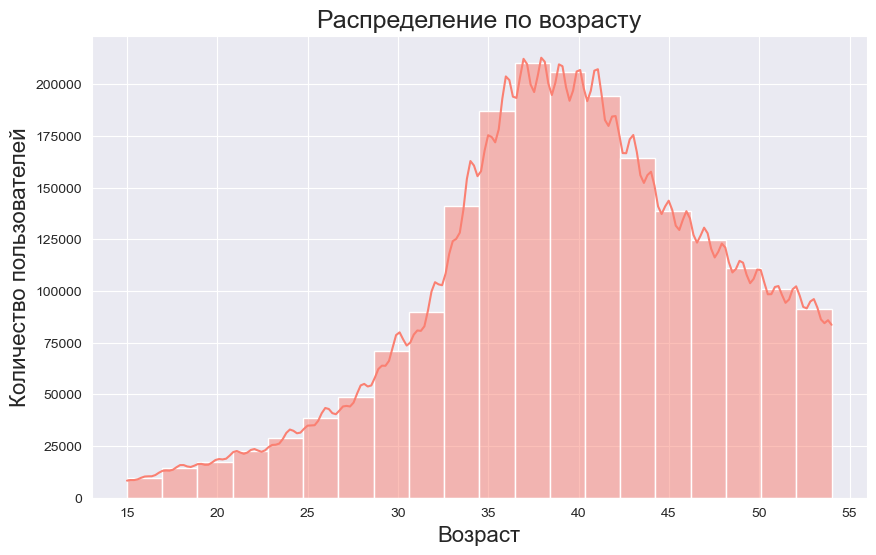

In [79]:
# Гистограмма
plt.figure(figsize=(10, 6))
sns.histplot(df['user_age'], bins=20, kde=True, color='salmon')
plt.title("Распределение по возрасту", fontsize=18)
plt.xlabel("Возраст", fontsize=16)
plt.ylabel("Количество пользователей", fontsize=16)
plt.show()

In [80]:
# Количество пользователей по возрастным группам
bins = [15, 24, 34, 44, 54]
labels = ['15-24', '25-34', '35-44', '45-54']
df['age_group'] = pd.cut(df['user_age'], bins=bins, labels=labels)
age_group_counts = df['age_group'].value_counts().sort_index()
print(age_group_counts)

age_group
15-24     87938
25-34    388987
35-44    960887
45-54    566455
Name: count, dtype: int64


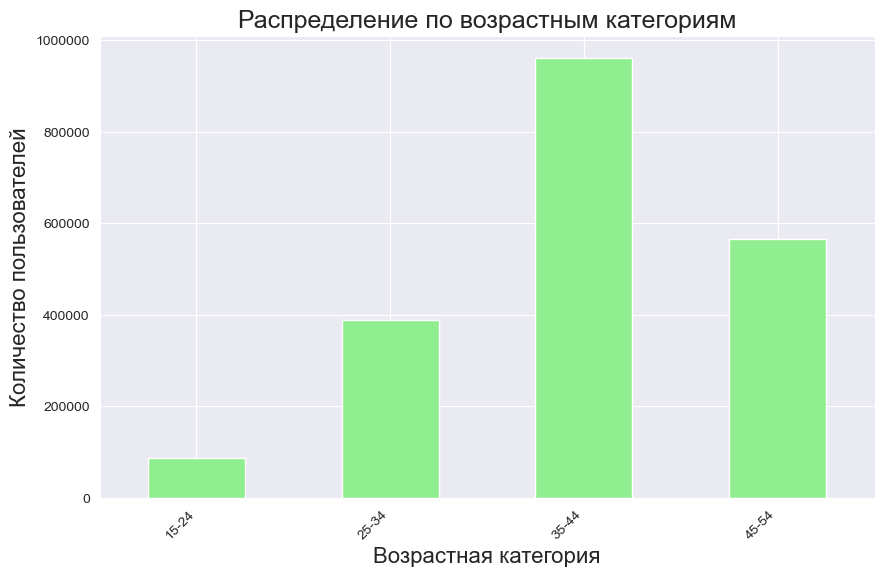

In [81]:
# Построение графика
ax = age_group_counts.plot(kind='bar', color='lightgreen', figsize=(10, 6))
plt.title("Распределение по возрастным категориям", fontsize=18)
plt.xlabel("Возрастная категория", fontsize=16)
plt.ylabel("Количество пользователей", fontsize=16)
# Настройка оси Y для целых чисел
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x)}'))
plt.xticks(rotation=45, ha='right')
plt.show()

Распределение по полу

In [82]:
# Количество пользователей по полу
sex_counts = df['user_sex'].value_counts()
print(sex_counts)

user_sex
W    1837043
M      94012
U      77515
Name: count, dtype: int64


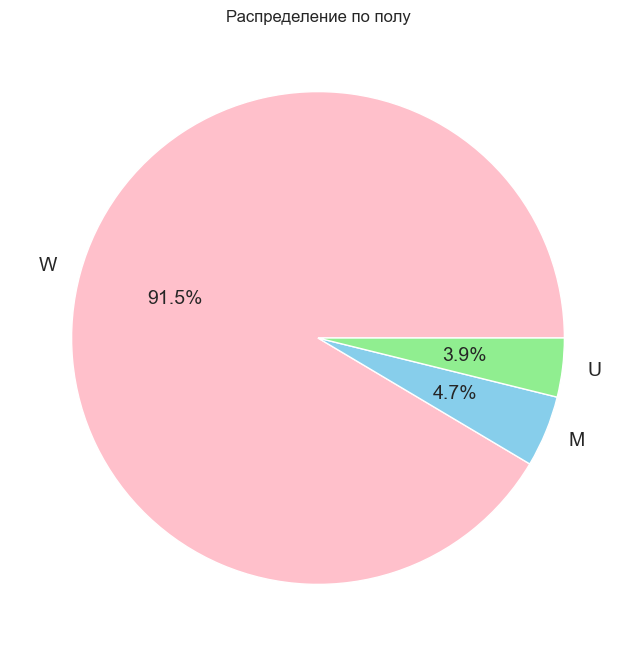

In [83]:
# Круговая диаграмма
sex_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(8, 8),
    labels=sex_counts.index,  
    colors=['pink', 'skyblue', 'lightgreen'], 
    title="Распределение по полу", fontsize=14)
plt.ylabel("")  
plt.show()

C:\Users\syoma\AppData\Local\Temp\ipykernel_14808\2174293926.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sex_counts = df.groupby(['age_group', 'user_sex']).size().unstack(fill_value=0)


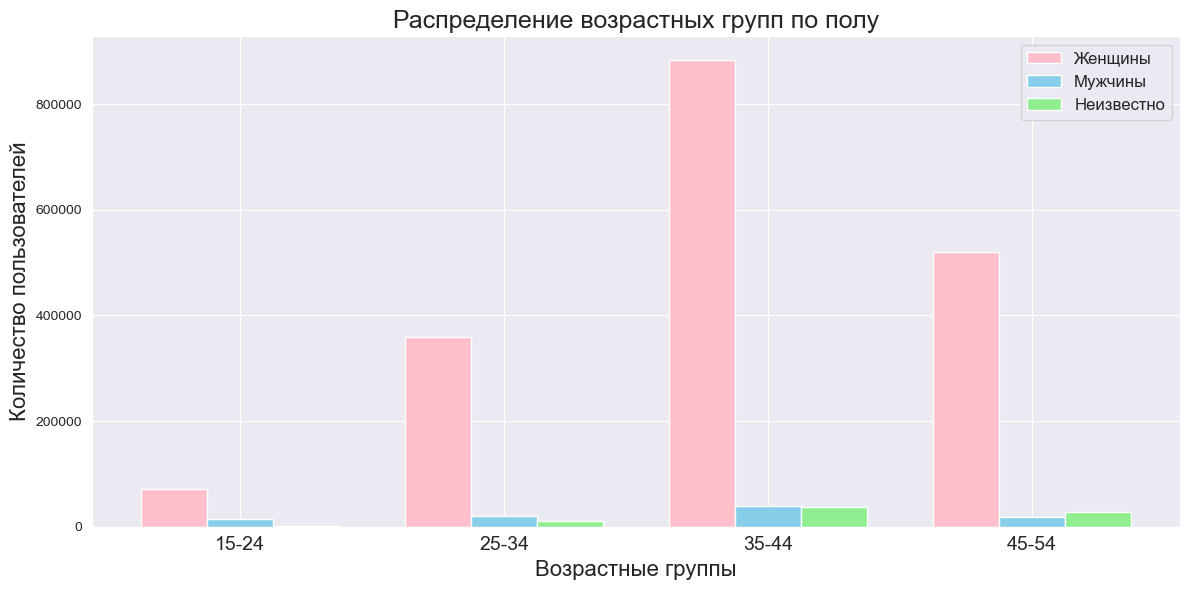

In [84]:
bins = [15, 24, 34, 44, 54]
labels = ['15-24', '25-34', '35-44', '45-54']
df['age_group'] = pd.cut(df['user_age'], bins=bins, labels=labels)

age_sex_counts = df.groupby(['age_group', 'user_sex']).size().unstack(fill_value=0)

categories = age_sex_counts.index
x = np.arange(len(categories))
bar_width = 0.25
plt.figure(figsize=(12, 6))

women_counts = age_sex_counts.get('W', [0] * len(categories))
men_counts = age_sex_counts.get('M', [0] * len(categories))
unknown_counts = age_sex_counts.get('U', [0] * len(categories))

plt.bar(x - bar_width, women_counts, width=bar_width, label='Женщины', color='pink')
plt.bar(x, men_counts, width=bar_width, label='Мужчины', color='skyblue')
plt.bar(x + bar_width, unknown_counts, width=bar_width, label='Неизвестно', color='lightgreen')

plt.xticks(x, categories, fontsize=14)
plt.xlabel('Возрастные группы', fontsize=16)
plt.ylabel('Количество пользователей', fontsize=16)
plt.title('Распределение возрастных групп по полу', fontsize=18)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

География

In [85]:
country_counts = df['country'].value_counts()
print(country_counts.head(10))

country
Россия        1729815
Казахстан       78597
Беларусь        68650
Грузия          23395
Германия        16597
Узбекистан       9748
Молдова          9642
Египет           9587
Латвия           7747
Словакия         6068
Name: count, dtype: int64


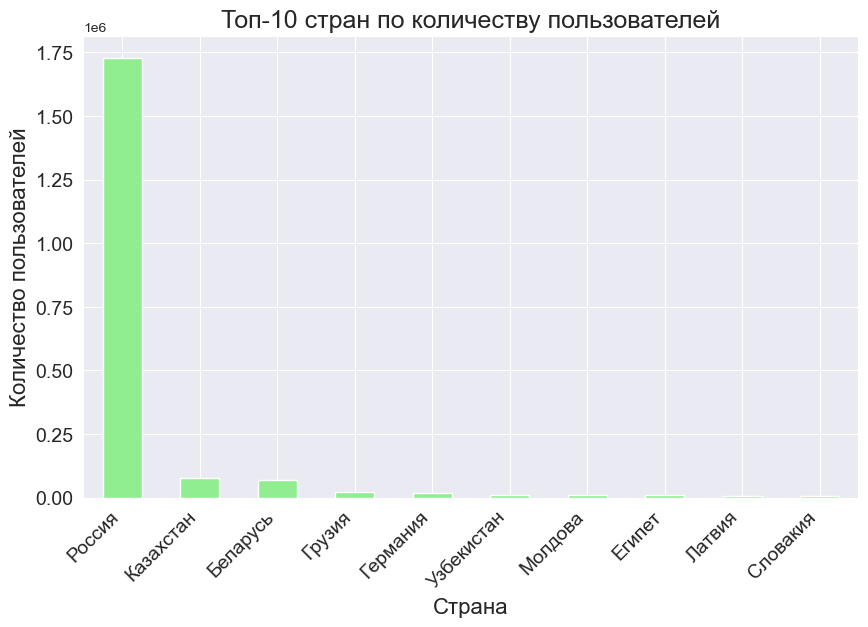

In [86]:
country_counts.head(10).plot(kind='bar', figsize=(10, 6), color='lightgreen', fontsize=14)
plt.title("Топ-10 стран по количеству пользователей", fontsize=18)
plt.xlabel("Страна", fontsize=16)
plt.ylabel("Количество пользователей", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

In [87]:
city_counts = df['delivery_city'].value_counts()
print(city_counts.head(10))

delivery_city
Москва             131345
Санкт-Петербург     82913
Новосибирск         46942
Минск               42886
Екатеринбург        35199
Казань              32485
Ставрополь          29825
Омск                29418
Барнаул             26420
Воронеж             25857
Name: count, dtype: int64


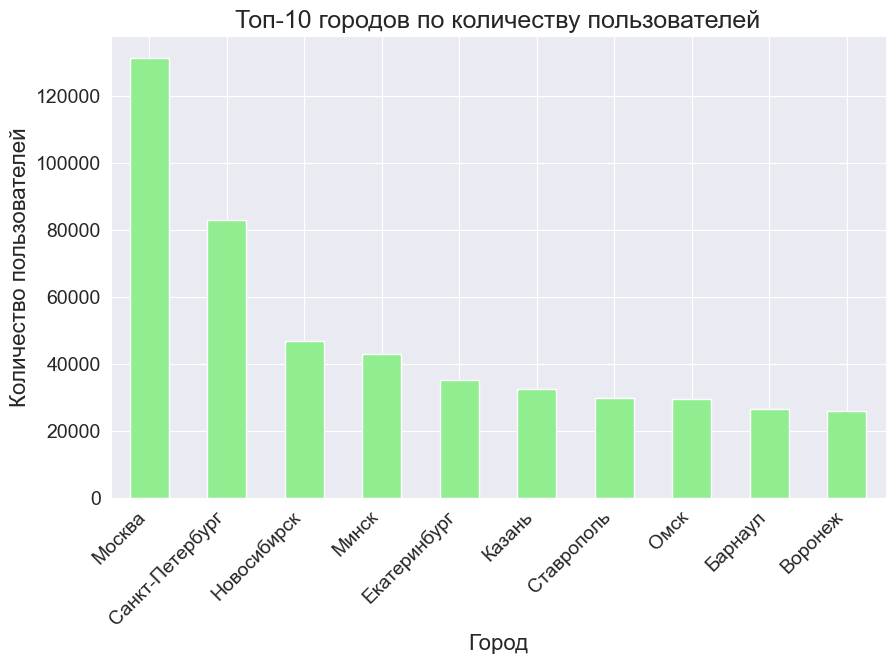

In [88]:
city_counts.head(10).plot(kind='bar', figsize=(10, 6), color='lightgreen', fontsize=14)
plt.title("Топ-10 городов по количеству пользователей", fontsize=18)
plt.xlabel("Город", fontsize=16)
plt.ylabel("Количество пользователей", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\syoma\AppData\Local\Temp\ipykernel_14808\3719326399.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_countries['age_group'] = pd.cut(df_top_countries['user_age'], bins=bins, labels=labels)
C:\Users\syoma\AppData\Local\Temp\ipykernel_14808\3719326399.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_country_counts = df_top_countries.groupby(['country', 'age_group']).size().unstack(fill_value=0)


<Figure size 1400x800 with 0 Axes>

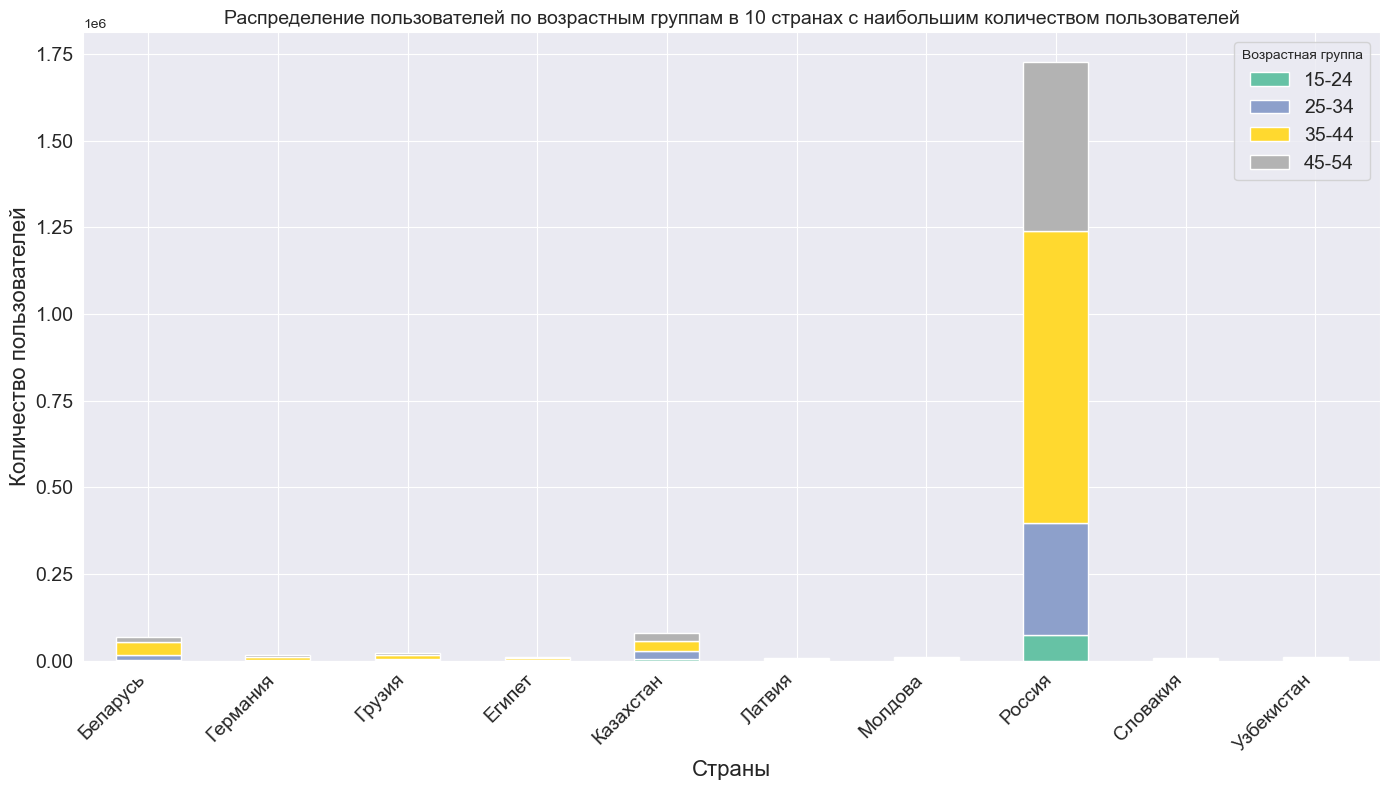

In [89]:
# 1. Считаем количество пользователей по странам
country_counts = df['country'].value_counts()

# 2. Получим топ-10 стран с наибольшим количеством пользователей
top_countries = country_counts.head(10).index

# 3. Фильтруем пользователей по этим странам
df_top_countries = df[df['country'].isin(top_countries)]

# 4. Создадим возрастные группы
bins = [15, 24, 34, 44, 54]  
labels = ['15-24', '25-34', '35-44', '45-54']  
df_top_countries['age_group'] = pd.cut(df_top_countries['user_age'], bins=bins, labels=labels)

# 5. Считаем количество пользователей по возрастным группам для каждой страны
age_group_country_counts = df_top_countries.groupby(['country', 'age_group']).size().unstack(fill_value=0)

# 6. Построим столбчатую диаграмму
plt.figure(figsize=(14, 8))
age_group_country_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2', fontsize=14)

# 7. Настроим заголовок и подписи
plt.title('Распределение пользователей по возрастным группам в 10 странах с наибольшим количеством пользователей', fontsize=14)
plt.xlabel('Страны', fontsize=16)
plt.ylabel('Количество пользователей', fontsize=16)
plt.xticks(rotation=45, ha='right')

plt.legend(title='Возрастная группа', fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\syoma\AppData\Local\Temp\ipykernel_14808\1442497192.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_cities['age_group'] = pd.cut(df_top_cities['user_age'], bins=bins, labels=labels)
C:\Users\syoma\AppData\Local\Temp\ipykernel_14808\1442497192.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_city_counts = df_top_cities.groupby(['delivery_city', 'age_group']).size().unstack(fill_value=0)


<Figure size 1400x800 with 0 Axes>

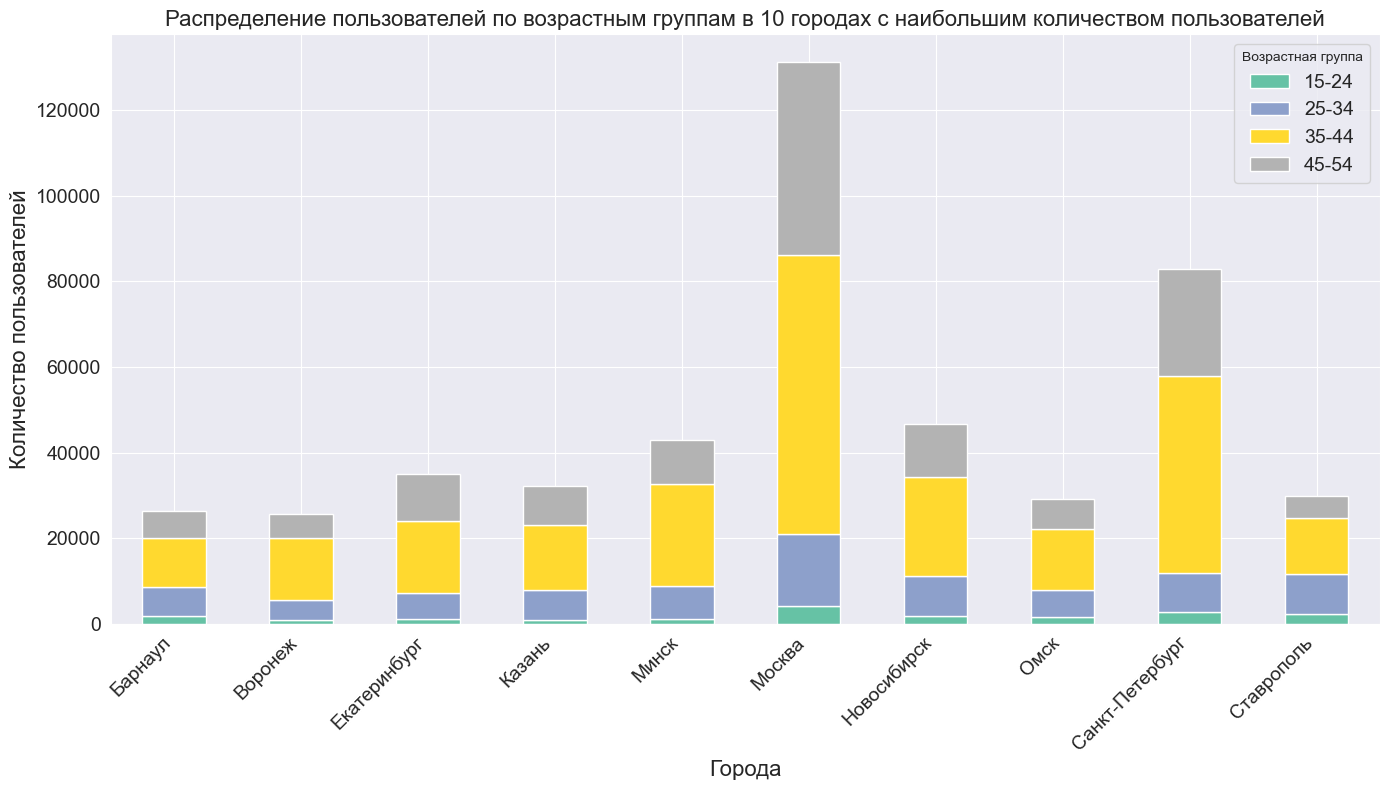

In [90]:
# 1. Считаем количество пользователей по городам
city_counts = df['delivery_city'].value_counts()

# 2. Получим топ-10 городов с наибольшим количеством пользователей
top_cities = city_counts.head(10).index

# 3. Фильтруем пользователей по этим городам
df_top_cities = df[df['delivery_city'].isin(top_cities)]

# 4. Создадим возрастные группы
bins = [15, 24, 34, 44, 54]  # Возрастные группы
labels = ['15-24', '25-34', '35-44', '45-54']  # Названия возрастных групп
df_top_cities['age_group'] = pd.cut(df_top_cities['user_age'], bins=bins, labels=labels)

# 5. Считаем количество пользователей по возрастным группам для каждого города
age_group_city_counts = df_top_cities.groupby(['delivery_city', 'age_group']).size().unstack(fill_value=0)

# 6. Построим столбчатую диаграмму
plt.figure(figsize=(14, 8))
age_group_city_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2', fontsize=14)

# 7. Настроим заголовок и подписи
plt.title('Распределение пользователей по возрастным группам в 10 городах с наибольшим количеством пользователей', fontsize=16)
plt.xlabel('Города', fontsize=16)
plt.ylabel('Количество пользователей', fontsize=16)
plt.xticks(rotation=45, ha='right')

plt.legend(title='Возрастная группа', fontsize=14)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

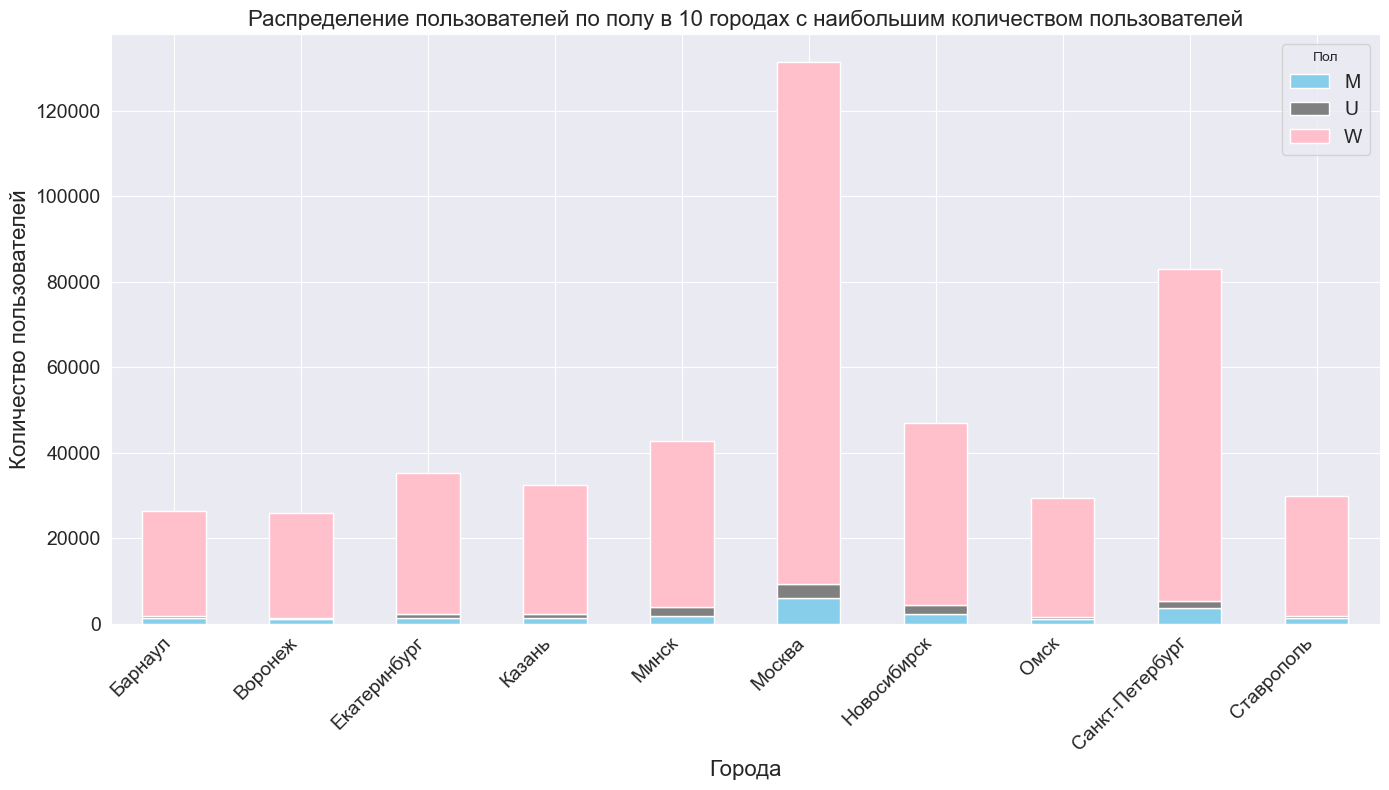

In [91]:
# 1. Считаем количество пользователей по городам
city_counts = df['delivery_city'].value_counts()

# 2. Получим топ-10 городов с наибольшим количеством пользователей
top_cities = city_counts.head(10).index

# 3. Фильтруем пользователей по этим городам
df_top_cities = df[df['delivery_city'].isin(top_cities)]

# 4. Считаем количество пользователей по полу для каждого города
gender_city_counts = df_top_cities.groupby(['delivery_city', 'user_sex']).size().unstack(fill_value=0)

# 5. Построим столбчатую диаграмму
plt.figure(figsize=(14, 8))
gender_city_counts.plot(kind='bar', stacked=True, figsize=(14, 8), color=['skyblue', 'gray', 'pink'], fontsize=14)

# 6. Настроим заголовок и подписи
plt.title('Распределение пользователей по полу в 10 городах с наибольшим количеством пользователей', fontsize=16)
plt.xlabel('Города', fontsize=16)
plt.ylabel('Количество пользователей', fontsize=16)
plt.xticks(rotation=45, ha='right')

plt.legend(title='Пол', fontsize=14)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

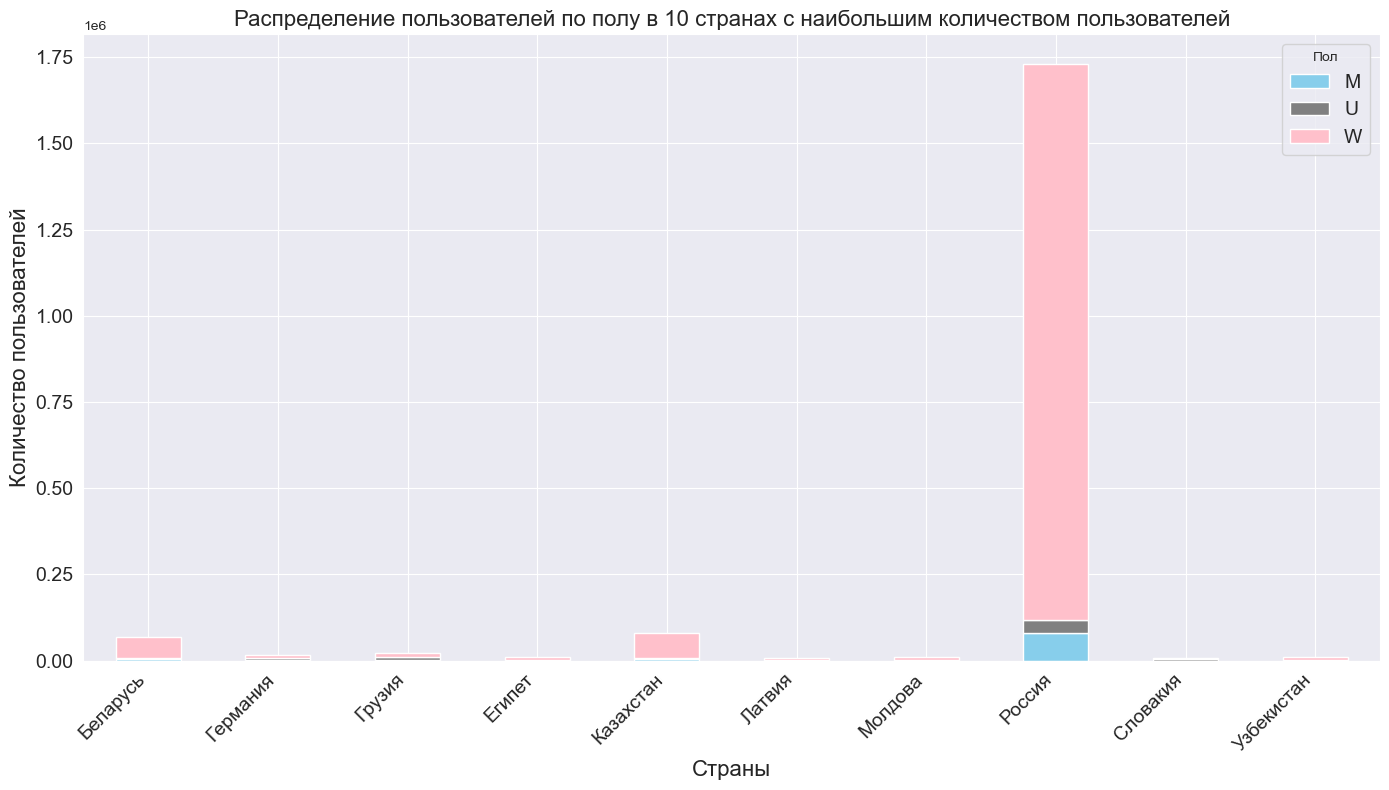

In [92]:
# 1. Считаем количество пользователей по странам
country_counts = df['country'].value_counts()

# 2. Получим топ-10 стран с наибольшим количеством пользователей
top_countries = country_counts.head(10).index

# 3. Фильтруем пользователей по этим странам
df_top_countries = df[df['country'].isin(top_countries)]

# 4. Считаем количество пользователей по полу для каждой страны
gender_country_counts = df_top_countries.groupby(['country', 'user_sex']).size().unstack(fill_value=0)

# 5. Построим столбчатую диаграмму
plt.figure(figsize=(14, 8))
gender_country_counts.plot(kind='bar', stacked=True, figsize=(14, 8), color=['skyblue', 'gray', 'pink'], fontsize=14)

# 6. Настроим заголовок и подписи
plt.title('Распределение пользователей по полу в 10 странах с наибольшим количеством пользователей', fontsize=16)
plt.xlabel('Страны', fontsize=16)
plt.ylabel('Количество пользователей', fontsize=16)
plt.xticks(rotation=45, ha='right')

plt.legend(title='Пол', fontsize=14)
plt.tight_layout()
plt.show()

## Сезонность

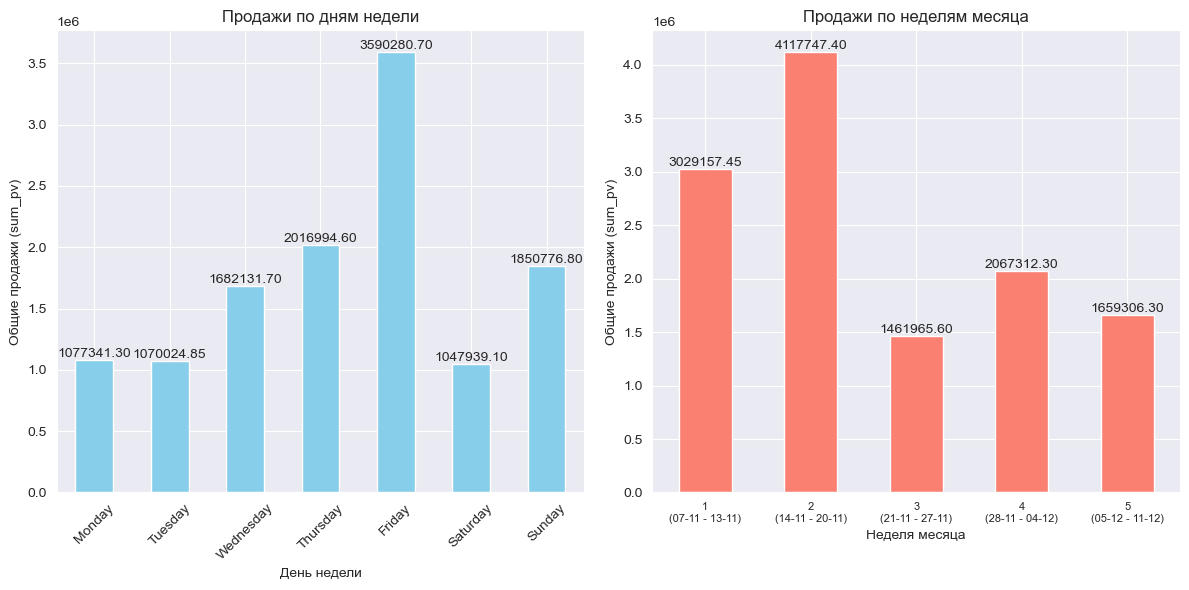

In [95]:
# Преобразование столбца с датами
df['date_paid'] = pd.to_datetime(df['date_paid'], format='%Y-%m-%d', errors='coerce')
df.loc[:, 'date_paid'] = pd.to_datetime(df['date_paid'], format='%Y-%m-%d') #df.loc[:, 'date_paid'] присваивает преобраз. значения обратно в столбец date_paid. 
                                                                            #loc[:, 'date_paid'] - мы обновляем все строки (:) в столбце date_paid.


# Добавление столбцов для дня недели и номера недели в месяце
df.loc[:, 'day_of_week'] = df['date_paid'].dt.day_name()  # добавляем новый столбец под названием day_of_week
                                                          # dt.day_name() берёт каждую дату из столбца date_paid и узнаёт, какой это день недели. 
                                                          # Например, если дата — это "2024-11-22", то day_name() вернет "Friday".

# Первая неделя с 7 по 13 ноября и т.д.
df.loc[:, 'week_of_month'] = ((df['date_paid'] - pd.Timestamp('2024-11-07')).dt.days // 7) + 1  
                                         # pd.Timestamp('2024-11-07') используем эту дату как отправную точку для вычисления номера недели в месяце.
                                         # dt.days - получаем количество дней между 7 ноября и каждой датой в date_paid
                                         # // 7 - делим количество дней на 7. Это позволяет определить, сколько полных недель прошло с 7 ноября
                                         # Поскольку мы начинаем с 7 ноября и считаем, что это первая неделя, мы добавляем 1 к результату. 

# Агрегация данных по дням недели
sales_by_day = df.groupby('day_of_week')['sum_pv'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
                                                                   #reindex() упорядочивает данные в соответствии с привычным порядком 

# Агрегация данных по неделям месяца
sales_by_week = df.groupby('week_of_month')['sum_pv'].sum()

# Создание периодов для каждой недели (нужно, чтобы потом подписать их на графике)
week_start_dates = [pd.Timestamp('2024-11-07') + pd.Timedelta(weeks=i) for i in range(len(sales_by_week))] 
week_end_dates = [start + pd.Timedelta(days=6) for start in week_start_dates]
week_periods = [f'{start.strftime("%d-%m")} - {end.strftime("%d-%m")}' for start, end in zip(week_start_dates, week_end_dates)]

# Визуализация результатов
plt.figure(figsize=(12, 6))  #plt.figure() создает новое окно для визуализации; ширина фигуры - 12 дюймов, высота — 6 дюймов.

# График продаж по дням недели
plt.subplot(1, 2, 1) #1 - количество строк в сетке подграфиков; 2 - количество столбцов; 1 - настраиваем первый график
sales_by_day.plot(kind='bar', color='skyblue') #kind='bar' указывает, что мы хотим построить столбчатую диаграмму
plt.title('Продажи по дням недели')
plt.xlabel('День недели')
plt.ylabel('Общие продажи (sum_pv)')
plt.xticks(rotation=45) #plt.xticks(rotation=45) поворачивает метки на оси X на 45 градусов. 

# Добавление значений над столбцами
for index, value in enumerate(sales_by_day): #enumerate() возвращает индекс (index) и значение (value) для каждого элемента в sales_by_day
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom') #index -координата по оси X, где будет размещен текст (соответствует индексу столбца на графике)
                                                                     #value - по оси Y, соответствует высоте столбца
                                                                     #f'{value:.2f}' -преобразует значение в строку с двумя знаками после запятой
                                                                     #ha (horizontal alignment) и va (vertical alignment)
                                                                     #va='bottom' - нижняя часть текста будет совпадать с указанной координатой по оси Y. 
# График продаж по неделям месяца
plt.subplot(1, 2, 2) 
#sales_by_week.plot(kind='bar', color='salmon')
ax = sales_by_week.plot(kind='bar', color='salmon')
plt.title('Продажи по неделям месяца')
plt.xlabel('Неделя месяца')
plt.ylabel('Общие продажи (sum_pv)')
plt.xticks(rotation=0)

# Установка меток для недель с периодами
xticks_labels = [f'{i+1}\n({period})' for i, period in enumerate(week_periods)]
ax.set_xticklabels(xticks_labels, rotation=0)  # ax.set_xticklabels(...) устанавливает метки для делений по оси X графика 
                                               #ax - отвечает за создание и управление одной или несколькими осями на графике
                                               #xticks_labels список меток, каждая метка - это номер недели и соответствующий период.


# Установка размера шрифта для меток
plt.xticks(fontsize=8) 


# Добавление значений над столбцами
for index, value in enumerate(sales_by_week):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout() #автоматически регулирует параметры подгонки подграфиков в фигуре, чтобы минимизировать перекрытие элементов графика
plt.show()


## Тип покупки: online/offline

In [96]:
online_offline_stats = df.groupby("purchase_type")["sum_pv"].agg(["count", "mean", "sum"]).reset_index()
print("Статистика покупок по типу:")
print(online_offline_stats)

Статистика покупок по типу:
  purchase_type    count      mean         sum
0        RETAIL   446024  6.476929  2888865.60
1           WEB  1562546  6.045661  9446623.45


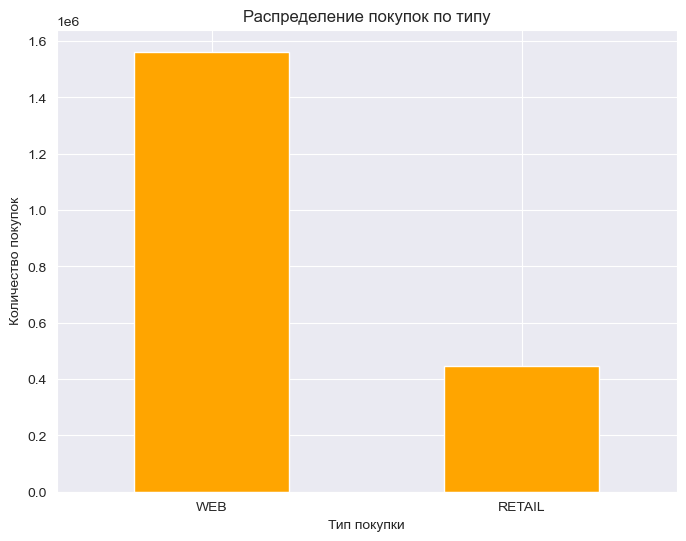

In [97]:
# 2. Графический анализ: распределение покупок
plt.figure(figsize=(8, 6))
df["purchase_type"].value_counts().plot(kind="bar", color='orange')
plt.title("Распределение покупок по типу")
plt.xlabel("Тип покупки")
plt.ylabel("Количество покупок")
plt.xticks(rotation=0)
plt.show()

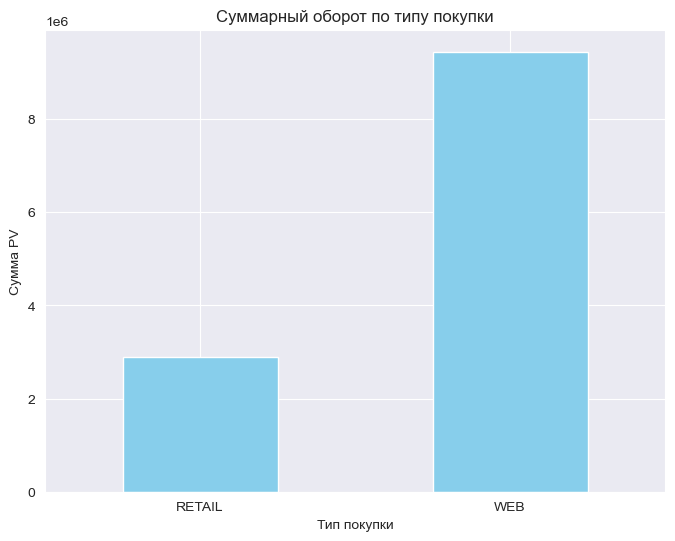

In [98]:
# 3. График суммарного оборота по типам
plt.figure(figsize=(8, 6))
df.groupby("purchase_type")["sum_pv"].sum().plot(kind="bar", color='skyblue')
plt.title("Суммарный оборот по типу покупки")
plt.xlabel("Тип покупки")
plt.ylabel("Сумма PV")
plt.xticks(rotation=0)
plt.show()

In [100]:
# 4. График: кто больше покупает онлайн и офлайн по полу
sex_purchase_stats = df.groupby(["purchase_type", "user_sex"])["sum_pv"].sum().unstack()
sex_purchase_stats

user_sex,M,U,W
purchase_type,,,
RETAIL,194904.7,84780.4,2609180.50
WEB,525376.1,482247.8,8438999.55


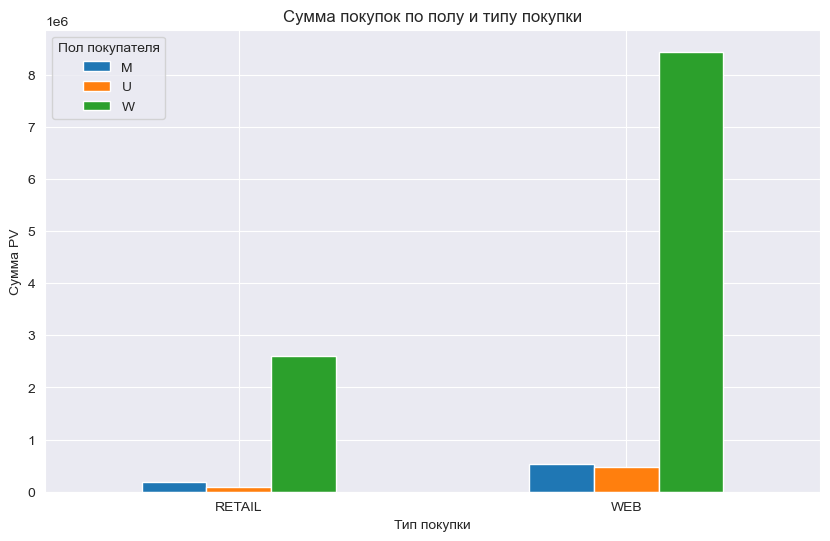

In [101]:
# График покупок по полу и типу
sex_purchase_stats.plot(kind="bar", figsize=(10, 6))
plt.title("Сумма покупок по полу и типу покупки")
plt.xlabel("Тип покупки")
plt.ylabel("Сумма PV")
plt.xticks(rotation=0)
plt.legend(title="Пол покупателя")
plt.show()

In [103]:
# 5. График: распределение количества заказов по полу для каждого типа покупки
sex_count_stats = df.groupby(["purchase_type", "user_sex"])["customer_id"].count().unstack()
sex_count_stats

user_sex,M,U,W
purchase_type,,,
RETAIL,25519,12317,408188
WEB,68493,65198,1428855


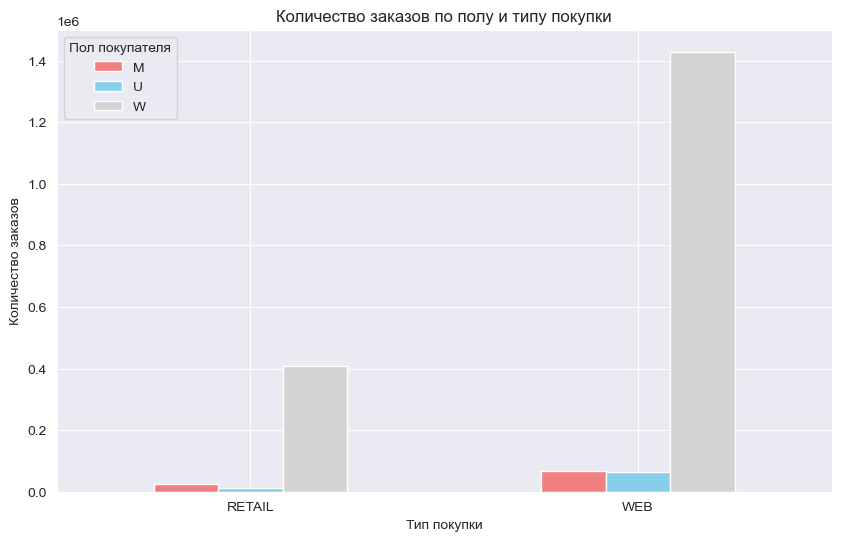

In [104]:
# График количества заказов
sex_count_stats.plot(kind="bar", figsize=(10, 6), color=['lightcoral', 'skyblue', 'lightgray'])
plt.title("Количество заказов по полу и типу покупки")
plt.xlabel("Тип покупки")
plt.ylabel("Количество заказов")
plt.xticks(rotation=0)
plt.legend(title="Пол покупателя")
plt.show()

C:\Users\syoma\AppData\Local\Temp\ipykernel_14808\3605184648.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = df.groupby(['purchase_type', 'age_group'])['sum_pv'].sum().unstack()


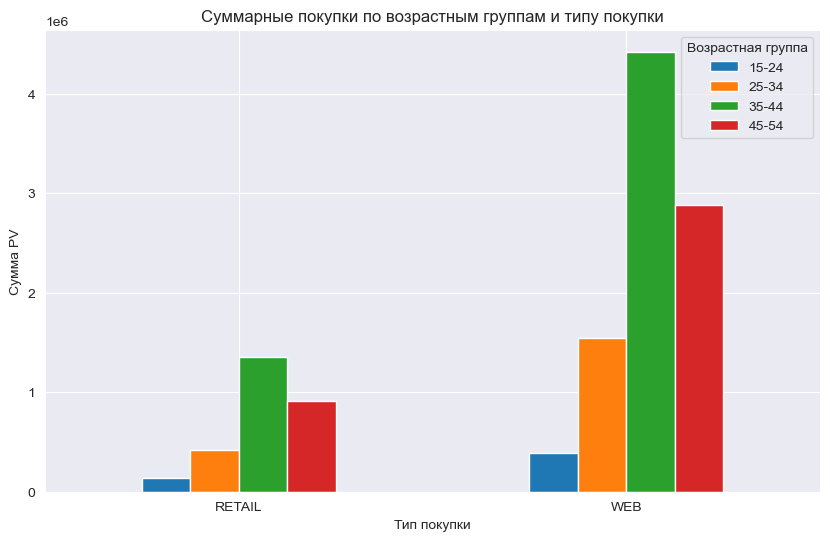

In [105]:
# Добавление возрастных категорий
bins = [15, 24, 34, 44, 54]
labels = ['15-24', '25-34', '35-44', '45-54']
df['age_group'] = pd.cut(df['user_age'], bins=bins, labels=labels, right=False)

# Распределение покупок по возрастным группам и типу
age_stats = df.groupby(['purchase_type', 'age_group'])['sum_pv'].sum().unstack()

# График
age_stats.plot(kind='bar', figsize=(10, 6))
plt.title("Суммарные покупки по возрастным группам и типу покупки")
plt.xlabel("Тип покупки")
plt.ylabel("Сумма PV")
plt.xticks(rotation=0)
plt.legend(title="Возрастная группа")
plt.show()


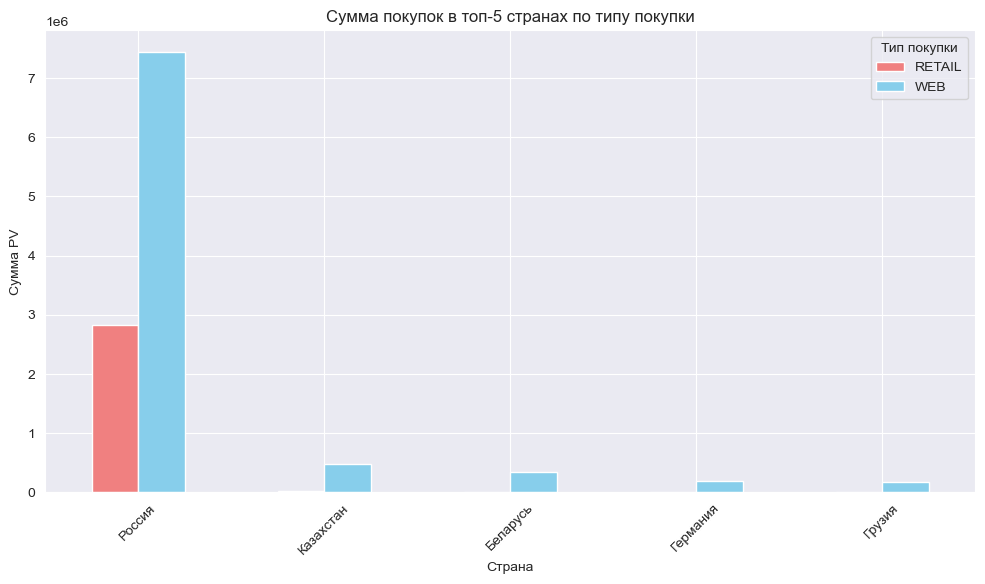

In [106]:
# Суммарная покупательная активность по странам
country_stats = df.groupby(['country', 'purchase_type'])['sum_pv'].sum().unstack().fillna(0)

# Выбор топ-5 стран с наибольшей суммарной покупательной активностью
top_countries = country_stats.sum(axis=1).nlargest(5).index

# Фильтрация данных для топ-5 стран
country_stats_top5 = country_stats.loc[top_countries]

# График
country_stats_top5.plot(kind='bar', figsize=(12, 6), color=['lightcoral', 'skyblue'])
plt.title("Сумма покупок в топ-5 странах по типу покупки")
plt.xlabel("Страна")
plt.ylabel("Сумма PV")
plt.xticks(rotation=45)
plt.legend(title="Тип покупки")
plt.show()

Средний чек (сумма PV) по типу покупки:
purchase_type
RETAIL    6.476929
WEB       6.045661
Name: sum_pv, dtype: float64


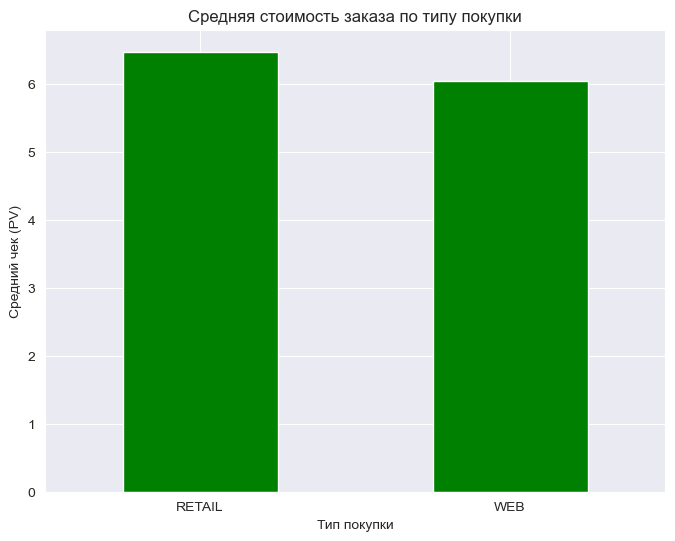

In [107]:
avg_order_value = df.groupby("purchase_type")["sum_pv"].mean()
print("Средний чек (сумма PV) по типу покупки:")
print(avg_order_value)

# График
avg_order_value.plot(kind="bar", figsize=(8, 6), color="green")
plt.title("Средняя стоимость заказа по типу покупки")
plt.xlabel("Тип покупки")
plt.ylabel("Средний чек (PV)")
plt.xticks(rotation=0)
plt.show()

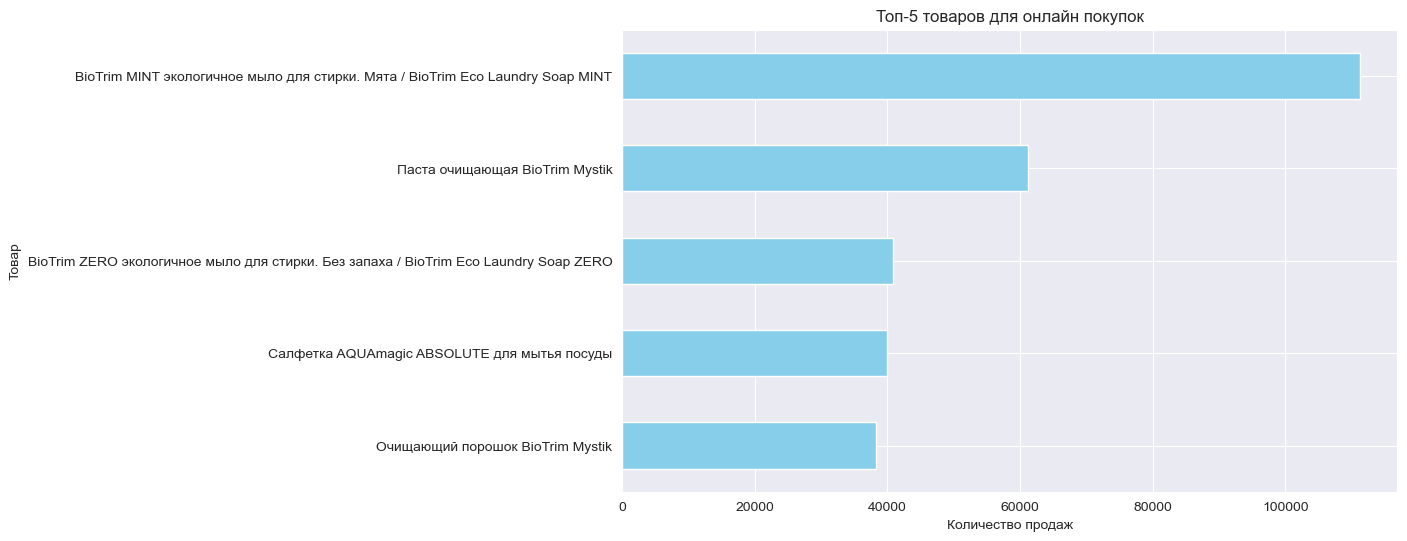

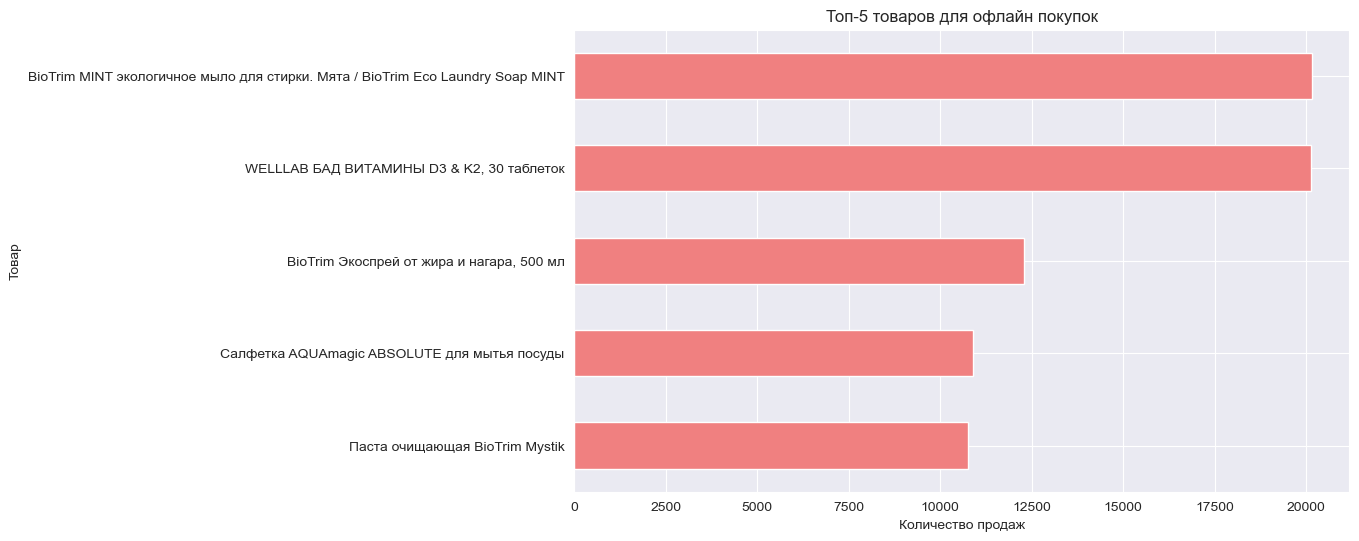

In [108]:
# Топ-5 товаров для онлайн покупок
top_items_online = df[df['purchase_type'] == 'WEB'].groupby('title_name')['amount'].sum().nlargest(5)

# Топ-5 товаров для офлайн покупок
top_items_offline = df[df['purchase_type'] == 'RETAIL'].groupby('title_name')['amount'].sum().nlargest(5)

# График для онлайн покупок
plt.figure(figsize=(10, 6))
top_items_online.plot(kind='barh', color='skyblue')
plt.title("Топ-5 товаров для онлайн покупок")
plt.xlabel("Количество продаж")
plt.ylabel("Товар")
plt.gca().invert_yaxis()  # Инвертировать ось Y для лучшей читаемости
plt.show()

# График для офлайн покупок
plt.figure(figsize=(10, 6))
top_items_offline.plot(kind='barh', color='lightcoral')
plt.title("Топ-5 товаров для офлайн покупок")
plt.xlabel("Количество продаж")
plt.ylabel("Товар")
plt.gca().invert_yaxis()  # Инвертировать ось Y для лучшей читаемости
plt.show()

## Матрица товаров

In [18]:
not_null_items = df[df['sum_pv'] != 0]
basket = not_null_items.groupby(['customer_id', 'order_number', 'articul'])['amount'].sum().reset_index(name='count')
basket

,customer_id,order_number,articul,count
0,236,0007-906951,012636,11
1,241,0007-906960,03401,1
2,241,0007-907515,07035,1
3,241,0007-907515,07039,1
4,241,0007-907515,07054,1
...,...,...,...,...
1892581,4708249,40673573,16083,1
1892582,4708252,40674296,02694EU,1
1892583,4708252,40674296,02928EU,1
1892584,4708252,40674296,02952EU,1


Создаем матрицу покупок по клиентам, где значения - купленное кол-во конкретного товара

In [19]:
basket_set = basket.groupby(['customer_id', 'articul'])['count'].sum().unstack().fillna(0).reset_index()
basket_set

articul,customer_id,00103,00301,00302,00303,00304,00305,00307,00311,00313,...,17039,17040,17042,17044,17044EU,17045,17045EU,17060,17060EU,60159
0,236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125718,4708244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125719,4708245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125720,4708248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125721,4708249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Бинаризируем матрицу, теперь значения - булевая переменная, где True - товар куплен; False - товар не куплен. Это необходимо для анализа правил ассоциации

In [20]:
basket_set = basket_set.set_index('customer_id')
basket_set_binary = (basket_set > 0).astype(int)
basket_set_binary = basket_set_binary.astype(bool)
basket_set_binary

articul,00103,00301,00302,00303,00304,00305,00307,00311,00313,00314,...,17039,17040,17042,17044,17044EU,17045,17045EU,17060,17060EU,60159
customer_id,,,,,,,,,,,,,,,,,,,,,
236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
244,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
273,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
281,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4708244,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4708245,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4708248,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Создаем корреляционную матрицу товаров, в которой на персечении артикулов находится корреляция Пирсона

In [17]:
correlation_matrix = basket_set_binary.corr(method='pearson')
correlation_matrix

articul,00103,00301,00302,00303,00304,00305,00307,00311,00313,00314,...,17039,17040,17042,17044,17044EU,17045,17045EU,17060,17060EU,60159
articul,,,,,,,,,,,,,,,,,,,,,
00103,1.000000,-0.000065,-0.000046,-0.000026,-0.000059,-0.000070,-0.000037,-0.000053,-0.000070,-0.000065,...,-0.000112,0.018556,-0.000842,0.008770,-0.000225,0.002067,-0.000300,0.008051,-0.000233,-0.000070
00301,-0.000065,1.000000,0.471388,-0.000019,0.912867,0.154260,-0.000028,-0.000039,-0.000052,-0.000048,...,-0.000083,-0.000310,-0.000622,-0.001168,-0.000167,-0.001501,-0.000221,-0.000663,-0.000172,-0.000052
00302,-0.000046,0.471388,1.000000,-0.000014,0.516383,0.218190,-0.000019,-0.000028,-0.000036,-0.000034,...,-0.000058,-0.000219,-0.000440,-0.000826,-0.000118,-0.001061,-0.000157,-0.000469,-0.000122,-0.000036
00303,-0.000026,-0.000019,-0.000014,1.000000,-0.000018,-0.000021,-0.000011,-0.000016,-0.000021,-0.000019,...,-0.000034,-0.000127,-0.000254,-0.000477,-0.000068,-0.000613,-0.000090,-0.000271,-0.000070,-0.000021
00304,-0.000059,0.912867,0.516383,-0.000018,1.000000,0.168992,-0.000025,-0.000036,-0.000047,-0.000044,...,-0.000075,-0.000283,-0.000568,-0.001066,-0.000152,-0.001370,-0.000202,-0.000605,-0.000157,-0.000047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17045,0.002067,-0.001501,-0.001061,-0.000613,-0.001370,-0.001621,-0.000867,-0.001226,-0.001621,-0.001501,...,0.003809,0.027030,0.048304,0.232084,-0.003645,1.000000,-0.005766,0.049757,-0.005413,-0.001621
17045EU,-0.000300,-0.000221,-0.000157,-0.000090,-0.000202,-0.000239,-0.000128,-0.000181,-0.000239,-0.000221,...,-0.000384,0.004105,-0.002884,-0.003904,0.422068,-0.005766,1.000000,-0.003074,0.079020,-0.000239
17060,0.008051,-0.000663,-0.000469,-0.000271,-0.000605,-0.000716,-0.000383,-0.000541,-0.000716,-0.000663,...,0.026832,0.034912,0.038245,0.040841,-0.002312,0.049757,-0.003074,1.000000,-0.002390,-0.000716


Выводим пары товаров и их корреляцию, сортируем по убыванию корреляции

In [25]:
correlation_pairs = correlation_matrix.stack().rename_axis(['item_1', 'item_2']).reset_index(name='correlation')
correlation_pairs = correlation_pairs[correlation_pairs['correlation'] != 1]
correlation_pairs['sorted_items'] = correlation_pairs.apply(lambda x: tuple(sorted([x['item_1'], x['item_2']])), axis=1)
correlation_pairs = correlation_pairs.drop_duplicates(subset='sorted_items')
correlation_pairs = correlation_pairs.drop(columns=['sorted_items'])
correlation_pairs = correlation_pairs.sort_values(by='correlation', ascending=False)
correlation_pairs

,item_1,item_2,correlation
1126401,05111,05112,0.914180
1283,00301,00304,0.912867
738561,02942,02943,0.845611
769281,02977,02978,0.759681
632321,02827,02828,0.743407
...,...,...,...
913928,03230EU,03301,-0.049518
907534,03228,03301EU,-0.050865
907525,03228,03230EU,-0.058300
924163,03301,03302EU,-0.060986


Создаем каталог товаров: Артикул - Название

In [26]:
items_catalog = df.groupby('articul')['title_name'].first().reset_index()
items_catalog

,articul,title_name
0,00103,"Ecopam Time, 60 капсул"
1,00301,"Welllab ANTIGELM, 60 капсул"
2,00302,"Welllab ANTISOR, 40 капсул"
3,00303,"Welllab CARDIO, 40 капсул"
4,00304,"Welllab FUNGISTOP, 60 капсул"
...,...,...
1459,17063,"Пакет ""Enjoy"" без ручек 25х12х8 см."
1460,17068,"Big Gift package, 33*26*9"
1461,17069,Small Gift package 17*22*9
1462,17071,Small Craft bag 32*22*12


Выводим пары товаров с названиями

In [29]:
correlation_pairs = correlation_pairs.merge(
    items_catalog.rename(columns={'articul': 'item_1', 'title_name': 'item_1_name'}),
    on='item_1',
    how='left'
)
correlation_pairs = correlation_pairs.merge(
    items_catalog.rename(columns={'articul': 'item_2', 'title_name': 'item_2_name'}),
    on='item_2',
    how='left'
)
correlation_pairs = correlation_pairs[['correlation','item_1', 'item_1_name', 'item_2', 'item_2_name']]
correlation_pairs

,correlation,item_1,item_1_name,item_2,item_2_name
0,0.914180,05111,iGen body услуга по тестированию (без комплект...,05112,iGen health услуга по тестированию (без компле...
1,0.912867,00301,"Welllab ANTIGELM, 60 капсул",00304,"Welllab FUNGISTOP, 60 капсул"
2,0.845611,02942,SHARME BATH. Натуральный бурлящий шар для ванн...,02943,SHARME BATH. Натуральный бурлящий шар для ванн...
3,0.759681,02977,Sharme Bath. Кокосовое молочко для ванны увлаж...,02978,Sharme Bath. Кокосовое молочко для ванны рассл...
4,0.743407,02827,SHARME BATH. Сахарно-солевой взбитый скраб для...,02828,SHARME BATH. Сахарно-солевой скраб для тела «М...
...,...,...,...,...,...
817246,-0.049518,03230EU,"BioTrim Laundry Sheets ZERO, 38 pcs.",03301,Паста очищающая BioTrim Mystik
817247,-0.050865,03228,BioTrim MINT экологичное мыло для стирки. Мята...,03301EU,Mystik. Cleansing paste
817248,-0.058300,03228,BioTrim MINT экологичное мыло для стирки. Мята...,03230EU,"BioTrim Laundry Sheets ZERO, 38 pcs."
817249,-0.060986,03301,Паста очищающая BioTrim Mystik,03302EU,Mystik. Cleansing powder


## Товарные рекомендации

Анализируем правила ассоциации - находим часто встречающиеся группы товаров в общем объеме

In [6]:
frequent_itemsets = apriori(basket_set_binary, min_support=0.024, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.031553,(00330)
1,0.035069,(00331)
2,0.124210,(00332)
3,0.033128,(00333)
4,0.032357,(00334)
...,...,...
1083,0.024204,"(02942, 02978, 02977, 02827, 02828, 02979)"
1084,0.024578,"(02978, 02977, 02827, 02943, 02828, 02979)"
1085,0.025771,"(02942, 02978, 02977, 02943, 02827, 02979)"
1086,0.026248,"(02942, 02978, 02977, 02943, 02828, 02979)"


Получаем ассоциативные правила, где:

antecedents - наборы товаров - условия правила

consequents - наборы товаров - результат правила

antecedent support - доля наборв товаров (из условия) в общем объеме

consequent support - доля наборов товаров (из результата) в общем объеме

support - доля наборов товаров (из условия и результата) в общем объеме

confidence - вероятность попадения товара из результата

In [8]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=len(frequent_itemsets))
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
5764,"(02942, 02978, 02977, 02827, 02828)",(02943),0.026113,0.118300,0.025564,0.978983,8.275441,1.0,0.022475,41.951042,0.902734,0.215098,0.976163,0.597539
5889,"(02942, 02978, 02827, 02828, 02979)",(02943),0.025246,0.118300,0.024713,0.978891,8.274666,1.0,0.021726,41.768904,0.901919,0.207965,0.976059,0.593897
5827,"(02942, 02977, 02827, 02828, 02979)",(02943),0.026320,0.118300,0.025763,0.978846,8.274282,1.0,0.022649,41.679230,0.902908,0.216757,0.976007,0.598311
6074,"(02942, 02978, 02977, 02827, 02979)",(02943),0.026344,0.118300,0.025771,0.978261,8.269340,1.0,0.022654,40.558211,0.902856,0.216795,0.975344,0.598053
6136,"(02942, 02978, 02977, 02828, 02979)",(02943),0.026853,0.118300,0.026248,0.977488,8.262808,1.0,0.023072,39.166053,0.903230,0.220751,0.974468,0.599683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,(03228),"(03302, 02763)",0.300908,0.032397,0.024117,0.080146,2.473897,1.0,0.014368,1.051910,0.852219,0.078000,0.049348,0.412280
1558,(03228),"(02771, 03301)",0.300908,0.031864,0.024109,0.080119,2.514444,1.0,0.014521,1.052459,0.861542,0.078106,0.049844,0.418367
4445,(03228),"(03302, 02943, 03301)",0.300908,0.029875,0.024085,0.080040,2.679151,1.0,0.015095,1.054530,0.896516,0.078529,0.051710,0.443108
2535,(03228),"(03011, 03505)",0.300908,0.035228,0.024077,0.080014,2.271296,1.0,0.013476,1.048681,0.800642,0.077154,0.046421,0.381732


Подвязываем к рекомендациям названия товаров для лучшего восприятия

In [14]:
def map_articuls_to_names(articuls, items_catalog):
    return ', '.join(
        [items_catalog.loc[items_catalog['articul'] == artic, 'title_name'].values[0] for artic in articuls.split(', ')]
    )
rules_with_names = rules.copy()
rules_with_names = rules_with_names.drop(['lift', 'representativity', 'leverage', 'conviction', 'zhangs_metric', 'jaccard', 'certainty', 'kulczynski'], axis=1)
rules_with_names['antecedents'] = rules_with_names['antecedents'].apply(lambda x: ', '.join(x))
rules_with_names['consequents'] = rules_with_names['consequents'].apply(lambda x: ', '.join(x))
rules_with_names['antecedent_names'] = rules_with_names['antecedents'].apply(lambda x: map_articuls_to_names(x, items_catalog))
rules_with_names['consequent_names'] = rules_with_names['consequents'].apply(lambda x: map_articuls_to_names(x, items_catalog))
rules_with_names = rules_with_names[['antecedents', 'antecedent_names','consequents', 'consequent_names', 'antecedent support', 'consequent support', 'support', 'confidence']]
rules_with_names

,antecedents,antecedent_names,consequents,consequent_names,antecedent support,consequent support,support,confidence
5764,"02942, 02978, 02977, 02827, 02828",SHARME BATH. Натуральный бурлящий шар для ванн...,02943,SHARME BATH. Натуральный бурлящий шар для ванн...,0.026113,0.118300,0.025564,0.978983
5889,"02942, 02978, 02827, 02828, 02979",SHARME BATH. Натуральный бурлящий шар для ванн...,02943,SHARME BATH. Натуральный бурлящий шар для ванн...,0.025246,0.118300,0.024713,0.978891
5827,"02942, 02977, 02827, 02828, 02979",SHARME BATH. Натуральный бурлящий шар для ванн...,02943,SHARME BATH. Натуральный бурлящий шар для ванн...,0.026320,0.118300,0.025763,0.978846
6074,"02942, 02978, 02977, 02827, 02979",SHARME BATH. Натуральный бурлящий шар для ванн...,02943,SHARME BATH. Натуральный бурлящий шар для ванн...,0.026344,0.118300,0.025771,0.978261
6136,"02942, 02978, 02977, 02828, 02979",SHARME BATH. Натуральный бурлящий шар для ванн...,02943,SHARME BATH. Натуральный бурлящий шар для ванн...,0.026853,0.118300,0.026248,0.977488
...,...,...,...,...,...,...,...,...
1509,03228,BioTrim MINT экологичное мыло для стирки. Мята...,"03302, 02763","Очищающий порошок BioTrim Mystik, Натуральный ...",0.300908,0.032397,0.024117,0.080146
1558,03228,BioTrim MINT экологичное мыло для стирки. Мята...,"02771, 03301","Мыло SHARME SOAP Ягодный йогурт/Berry yogurt, ...",0.300908,0.031864,0.024109,0.080119
4445,03228,BioTrim MINT экологичное мыло для стирки. Мята...,"03302, 02943, 03301","Очищающий порошок BioTrim Mystik, SHARME BATH....",0.300908,0.029875,0.024085,0.080040
2535,03228,BioTrim MINT экологичное мыло для стирки. Мята...,"03011, 03505",Крем для рук суперувлажнение и защита с маслам...,0.300908,0.035228,0.024077,0.080014


Пример использования данных рекомендаций: пишем функцию, которой на вход подается набор товаров из корзины. На выход получаем рекомендации наиболее вероятных к покупке товаров

In [15]:
def get_recommendations(articules, rules, items_catalog):
    input_articuls = frozenset(articules)
    matched_rules = rules[rules['antecedents'].apply(lambda x: x.issubset(input_articuls))]
    recommended_items = []
    for _, row in matched_rules.iterrows():
        for consequent in row['consequents']:
            if consequent not in input_articuls:
                recommended_items.append({
                    'articul': consequent,
                    'probability': row['confidence']
                })
    recommendations = pd.DataFrame(recommended_items)
    recommendations = recommendations.merge(items_catalog, on='articul', how='left')
    return recommendations

# Пример использования
articules = {'02942'}
recs = get_recommendations(articules, rules, items_catalog)
recs

,articul,probability,title_name
0,02943,0.887012,SHARME BATH. Натуральный бурлящий шар для ванн...
1,03228,0.550816,BioTrim MINT экологичное мыло для стирки. Мята...
2,02977,0.497871,Sharme Bath. Кокосовое молочко для ванны увлаж...
3,03228,0.495671,BioTrim MINT экологичное мыло для стирки. Мята...
4,02943,0.495671,SHARME BATH. Натуральный бурлящий шар для ванн...
...,...,...,...
512,02979,0.215969,Sharme Bath. Кокосовое молочко для ванны с ши...
513,02828,0.215827,SHARME BATH. Сахарно-солевой скраб для тела «М...
514,02979,0.215827,Sharme Bath. Кокосовое молочко для ванны с ши...
515,01619,0.215827,"TEAVITALL Напиток чайный Anyday Winter, 38 ф/п"
